In [1]:
import vizdoom as vzd
from random import choice
from time import sleep
import skimage.transform
import numpy as np

In [2]:
class ViZDoomENV:
    def __init__(self, seed):
        game = vzd.DoomGame()
        game.set_doom_scenario_path("ViZDoom_map/health_gathering.wad")
        
        # game input setup
        game.set_screen_resolution(vzd.ScreenResolution.RES_160X120)
        game.set_screen_format(vzd.ScreenFormat.RGB24)
        game.set_depth_buffer_enabled(True)
        
        # rendering setup
        game.set_render_hud(False)
        game.set_render_minimal_hud(False)  # If hud is enabled
        game.set_render_crosshair(False)
        game.set_render_weapon(True)
        game.set_render_decals(False)  # Bullet holes and blood on the walls
        game.set_render_particles(False)
        game.set_render_effects_sprites(False)  # Smoke and blood
        game.set_render_messages(False)  # In-game messages
        game.set_render_corpses(False)
        game.set_render_screen_flashes(True)  # Effect upon taking damage or picking up items
        
        # Adds buttons that will be allowed.
        game.add_available_button(vzd.Button.MOVE_LEFT)
        game.add_available_button(vzd.Button.MOVE_RIGHT)
        game.add_available_button(vzd.Button.MOVE_FORWARD)
        game.add_available_button(vzd.Button.MOVE_BACKWARD)
        # generate the corresponding actions
        num_buttons = 4
        actions = [([False] * num_buttons)for i in range(num_buttons)]
        for i in range(num_buttons):
            actions[i][i] = True
        self.actions = actions
        # set frame repeat for taking action
        self.frame_repeat = 1
        
        # Causes episodes to finish after 2000 tics (actions)
        game.set_episode_timeout(2000)
        # Sets the livin reward (for each move) to 1
        game.set_living_reward(1)
        # Sets ViZDoom mode (PLAYER, ASYNC_PLAYER, SPECTATOR, ASYNC_SPECTATOR, PLAYER mode is default)
        game.set_mode(vzd.Mode.PLAYER)
        
        game.set_seed(seed)
        game.init()
        
        self.game = game
        
        self.last_input = None
        
        
    def get_current_input(self):
        state = self.game.get_state()
        
        n = state.number
        screen_buf = state.screen_buffer
        depth_buf = state.depth_buffer
        
        # down sample to 84 * 84
        resolution = (84, 84)
        screen_buf = skimage.transform.resize(screen_buf, resolution)
        depth_buf = skimage.transform.resize(depth_buf, resolution)
        
        # change axis
        screen_buf = np.rollaxis(screen_buf, 2, 0)
        depth_buf = depth_buf[np.newaxis,:]
        
        res = np.vstack((screen_buf, depth_buf))
        
        self.last_input = (res, n)
        
        return res, n
    
    def step(self, action):
        info = {}
        reward = self.game.make_action(self.actions[action], self.frame_repeat)
        done = self.game.is_episode_finished()
        if done:
            ob, n = self.last_input
            info['Episode_Total_Reward'] = self.game.get_total_reward()
            info['Episode_Total_Len'] = n
        else:
            ob, n = self.get_current_input()
        
        return ob, reward, done, info
    
    def reset(self):
        self.game.new_episode()
        ob, n = self.get_current_input()
        return ob
    
    def close(self):
        self.game.close()
    

In [3]:
game = vzd.DoomGame()
game.set_doom_scenario_path("ViZDoom_map/health_gathering.wad")
#game.set_doom_map("map02")

In [6]:
episodes = 10
env = ViZDoomENV(0)
for i in range(episodes):
    ob = env.reset()
    done = False
    while not done:
        ob, reward, done, info = env.step(choice(range(num_buttons)))
        
        if sleep_time > 0:
            sleep(sleep_time)
        
        

/Users/harry/venv/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/harry/venv/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


NameError: name 'num_buttons' is not defined

In [145]:
game.set_screen_resolution(vzd.ScreenResolution.RES_160X120)
game.set_screen_format(vzd.ScreenFormat.RGB24)
game.set_depth_buffer_enabled(True)

In [146]:
# rendering
# Sets other rendering options (all of these options except crosshair are enabled (set to True) by default)
game.set_render_hud(False)
game.set_render_minimal_hud(False)  # If hud is enabled
game.set_render_crosshair(False)
game.set_render_weapon(True)
game.set_render_decals(False)  # Bullet holes and blood on the walls
game.set_render_particles(False)
game.set_render_effects_sprites(False)  # Smoke and blood
game.set_render_messages(False)  # In-game messages
game.set_render_corpses(False)
game.set_render_screen_flashes(True)  # Effect upon taking damage or picking up items

In [148]:
# Adds buttons that will be allowed.
game.add_available_button(vzd.Button.MOVE_LEFT)
game.add_available_button(vzd.Button.MOVE_RIGHT)
game.add_available_button(vzd.Button.MOVE_FORWARD)
game.add_available_button(vzd.Button.MOVE_BACKWARD)

In [149]:
# Causes episodes to finish after 200 tics (actions)
game.set_episode_timeout(2000)
# Makes episodes start after 10 tics (~after raising the weapon)
game.set_episode_start_time(10)
# Sets the livin reward (for each move) to -1
game.set_living_reward(-1)
# Sets ViZDoom mode (PLAYER, ASYNC_PLAYER, SPECTATOR, ASYNC_SPECTATOR, PLAYER mode is default)
game.set_mode(vzd.Mode.PLAYER)

In [150]:
game.init()

In [151]:
num_buttons = 4
actions = [([False] * num_buttons)for i in range(num_buttons)]
for i in range(num_buttons):
    actions[i][i] = True

In [152]:
actions

[[True, False, False, False],
 [False, True, False, False],
 [False, False, True, False],
 [False, False, False, True]]

In [153]:
# Run this many episodes
episodes = 1

In [154]:
# Sets time that will pause the engine after each action (in seconds)
# Without this everything would go too fast for you to keep track of what's happening.
sleep_time = 1.0 / vzd.DEFAULT_TICRATE # = 0.028

In [214]:
info

{'Episode_Total_Reward': 384.0}

In [155]:
for i in range(episodes):
    print("Episode #" + str(i + 1))

    # Starts a new episode. It is not needed right after init() but it doesn't cost much. At least the loop is nicer.
    game.new_episode()

    while not game.is_episode_finished():

        # Gets the state
        state = game.get_state()

        # Which consists of:
        n = state.number
        vars = state.game_variables
        screen_buf = state.screen_buffer
        depth_buf = state.depth_buffer
        labels_buf = state.labels_buffer
        automap_buf = state.automap_buffer
        labels = state.labels

        # Games variables can be also accessed via:
        #game.get_game_variable(GameVariable.AMMO2)

        # Makes a random action and get remember reward.
        r = game.make_action(choice(actions))

        # Makes a "prolonged" action and skip frames:
        # skiprate = 4
        # r = game.make_action(choice(actions), skiprate)

        # The same could be achieved with:
        # game.set_action(choice(actions))
        # game.advance_action(skiprate)
        # r = game.get_last_reward()

        # Prints state's game variables and reward.
        print("State #" + str(n))
        print("Game variables:", vars)
        print("Reward:", r)
        print("=====================")

        if sleep_time > 0:
            sleep(sleep_time)

    # Check how the episode went.
    print("Episode finished.")
    print("Total reward:", game.get_total_reward())
    print("************************")

Episode #1
State #1
Game variables: None
Reward: -5.0
State #2
Game variables: None
Reward: -5.0
State #3
Game variables: None
Reward: -5.0
State #4
Game variables: None
Reward: -5.0
State #5
Game variables: None
Reward: -5.0
State #6
Game variables: None
Reward: -5.0
State #7
Game variables: None
Reward: -5.0
State #8
Game variables: None
Reward: -5.0
State #9
Game variables: None
Reward: -5.0
State #10
Game variables: None
Reward: -5.0
State #11
Game variables: None
Reward: -5.0
State #12
Game variables: None
Reward: -5.0
State #13
Game variables: None
Reward: -5.0
State #14
Game variables: None
Reward: -5.0
State #15
Game variables: None
Reward: -5.0
State #16
Game variables: None
Reward: -5.0
State #17
Game variables: None
Reward: -5.0
State #18
Game variables: None
Reward: -5.0
State #19
Game variables: None
Reward: -5.0
State #20
Game variables: None
Reward: -5.0
State #21
Game variables: None
Reward: -5.0
State #22
Game variables: None
Reward: -5.0
State #23
Game variables: None

In [20]:
screen_buf.shape

(120, 160, 3)

In [21]:
depth_buf.shape

(120, 160)

In [5]:
vzd.ScreenResolution.__dict__

mappingproxy({'__init__': <instancemethod __init__ at 0x10f306f48>,
              '__doc__': None,
              '__module__': 'vizdoom.vizdoom',
              '__repr__': <instancemethod __repr__ at 0x10f306eb8>,
              '__members__': <pybind11_builtins.pybind11_static_property at 0x10f332e58>,
              '__int__': <instancemethod __int__ at 0x10f306fa8>,
              '__eq__': <instancemethod __eq__ at 0x10f33d0d8>,
              '__ne__': <instancemethod __ne__ at 0x10f33d048>,
              '__hash__': <instancemethod __hash__ at 0x10f33d108>,
              '__getstate__': <instancemethod __getstate__ at 0x10f33d168>,
              '__setstate__': <instancemethod __setstate__ at 0x10f33d1c8>,
              'RES_160X120': ScreenResolution.RES_160X120,
              'RES_200X125': ScreenResolution.RES_200X125,
              'RES_200X150': ScreenResolution.RES_200X150,
              'RES_256X144': ScreenResolution.RES_256X144,
              'RES_256X160': ScreenResolution.

In [24]:
import matplotlib.pyplot as plt

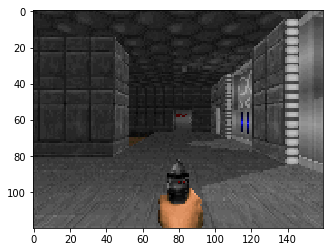

In [30]:
plt.imshow(screen_buf)

In [39]:
import skimage.transform

In [42]:
res = skimage.transform.resize(depth_buf, (84, 84))

/Users/harry/venv/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/harry/venv/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


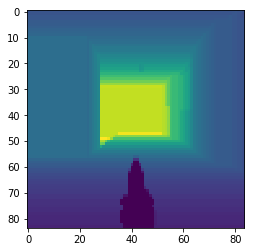

In [43]:
plt.imshow(res)

In [156]:
choice(actions)

[False, False, True, False]

In [158]:
screen_buf.shape

(120, 160, 3)

In [161]:
screen_buf[:,:,0].shape

(120, 160)

In [166]:
rolled = np.rollaxis(screen_buf, 2, 0)  

In [173]:
np.sum(rolled[0] - screen_buf[:,:,0])

0

In [171]:
screen_buf[:,:,0]

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [31, 19, 15, ..., 23, 39, 23],
       [31, 31, 23, ..., 23, 39, 39],
       [31, 31, 23, ..., 31, 23, 23]], dtype=uint8)

In [174]:
rolled.shape

(3, 120, 160)

In [183]:
t = np.vstack([rolled, rolled])

In [187]:
np.sum(t[:3,:,:] - rolled)

0

In [196]:
depth_buf.shape

(120, 160)